In [303]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [304]:
urllib.request.urlretrieve('https://data.cityofnewyork.us/api/views/gyrw-gvqc/rows.csv?accessType=DOWNLOAD', 'crowds.csv')

('crowds.csv', <http.client.HTTPMessage at 0x14f771190>)

In [305]:
# Obtaining data from the online CSV
def crowds_data_is_downloaded():
  filename = 'crowds.csv'

  if os.path.isfile(filename):
    
      return True
  else: 
      return False

if not crowds_data_is_downloaded():
  urllib.request.urlretrieve('https://data.cityofnewyork.us/api/views/gyrw-gvqc/rows.csv?accessType=DOWNLOAD', 'crowds.csv')

In [306]:
#Defining the dataframe
df = pd.read_csv('crowds.csv')



In [307]:
#Data cleaning
df.count() #Checking for missing data






encounter_timestamp    1890
park_area_id           1879
park_district          1890
park_borough           1890
patroncount            1890
in_playground          1890
action_taken           1890
amenity                1200
dtype: int64

In [308]:
df.dropna(inplace=True) #Amenity has 1200, missing ~700.Removed missing data.
df = df[df.patroncount >=3] 
print(df['patroncount'].min()) # Test to see minimum group set to 3
df = df[(df.amenity != 'Playground') | df.in_playground] #Remove conflicting Data in playground




3


In [309]:
#Explore data
crowd = df.groupby('amenity')['patroncount'].mean().sort_values(ascending=False) #amenity average crowd sizes
print(crowd)

amenity
Track/field area                      74.452830
Walking path                          67.899160
Open field/multi-purpose play area    59.555556
Baseball field                        50.438017
Soccer field                          39.069182
Basketball court                      33.888889
Adult fitness equipment               31.646465
Playground                            30.211009
Bench/sitting area                    23.813953
Chess area                            20.083333
Handall court                         15.863636
Skate Park                            12.000000
Tennis courts                         11.333333
Name: patroncount, dtype: float64


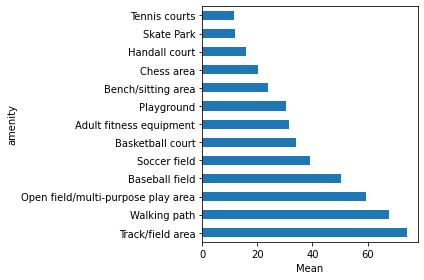

In [310]:
#Visualise Data
crowd.plot.barh()
plt.xlabel('Mean')
#plt.tight_layout() #Don't like this for now 
plt.show()
